In [2]:
import matplotlib.pyplot as plt
import numpy as np
from iqa_lib import *

In [9]:
# create .tfrecord dataset from two files with labeled data
ds = tf.data.TFRecordDataset(['./iqa_labeled_20180212.tfrecord', './iqa_labeled_20180216.tfrecord'])
ds = ds.map(preprocess)


<MapDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.string)>


In [5]:
# create dataframe from .csv files with bounding box information
df = pd.read_csv('./iqa_labeled_20180212.csv')
df = df.append(pd.read_csv('./iqa_labeled_20180216.csv'))
df.head()

filename  width  height             class  xmin  ymin  \
0  20180212_dc2_15_1_fw_200.png   4096     625  foreign material   869   142   
1  20180212_dc2_15_1_fw_200.png   4096     625  foreign material   523   256   
2  20180212_dc2_15_1_fw_200.png   4096     625  foreign material  1670   343   
3  20180212_dc2_15_1_fw_200.png   4096     625  foreign material  2026    70   
4  20180212_dc2_15_1_fw_200.png   4096     625  foreign material  1989   254   

   xmax  ymax  xmin_rel  xmax_rel  ymin_rel  ymax_rel  
0  1592   198  0.212158  0.388672    0.2272    0.3168  
1  1284   300  0.127686  0.313477    0.4096    0.4800  
2  2174   401  0.407715  0.530762    0.5488    0.6416  
3  2805   105  0.494629  0.684814    0.1120    0.1680  
4  3008   315  0.485596  0.734375    0.4064    0.5040

In [7]:
print(categories)
df['label'] = df['class'].map(lambda x: categories[x])
df.head()

{'none': 0, 'wrinkle': 1, 'twist': 2, 'foreign material': 3, 'overlap': 4, 'gap': 5}


filename  width  height             class  xmin  ymin  \
0  20180212_dc2_15_1_fw_200.png   4096     625  foreign material   869   142   
1  20180212_dc2_15_1_fw_200.png   4096     625  foreign material   523   256   
2  20180212_dc2_15_1_fw_200.png   4096     625  foreign material  1670   343   
3  20180212_dc2_15_1_fw_200.png   4096     625  foreign material  2026    70   
4  20180212_dc2_15_1_fw_200.png   4096     625  foreign material  1989   254   

   xmax  ymax  xmin_rel  xmax_rel  ymin_rel  ymax_rel  label  
0  1592   198  0.212158  0.388672    0.2272    0.3168      3  
1  1284   300  0.127686  0.313477    0.4096    0.4800      3  
2  2174   401  0.407715  0.530762    0.5488    0.6416      3  
3  2805   105  0.494629  0.684814    0.1120    0.1680      3  
4  3008   315  0.485596  0.734375    0.4064    0.5040      3

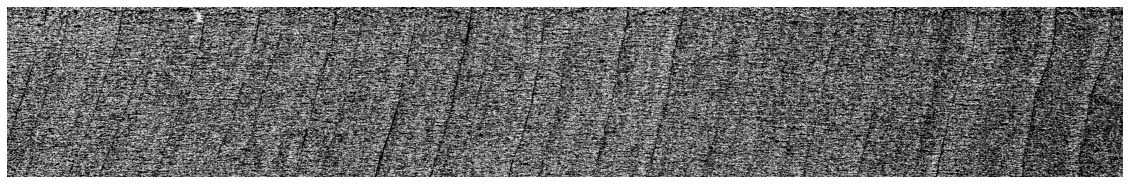

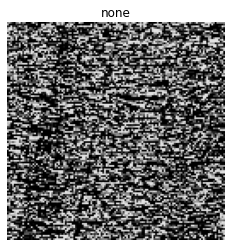

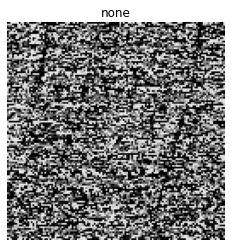

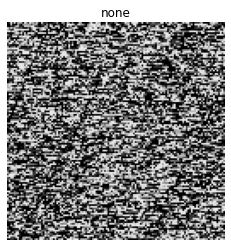

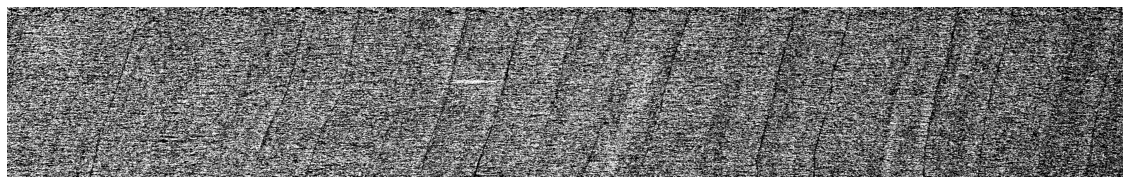

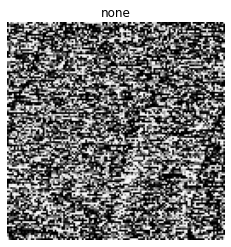

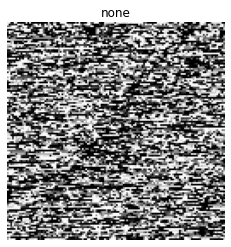

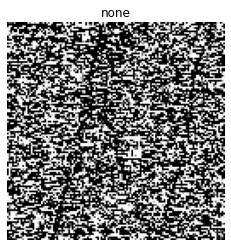

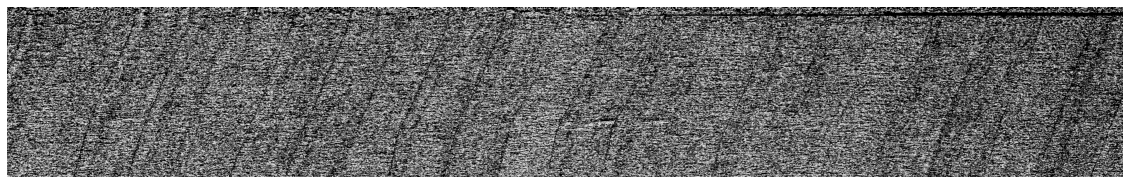

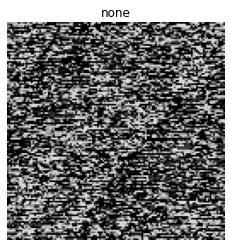

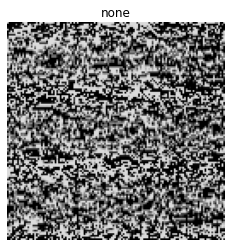

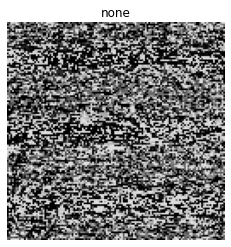

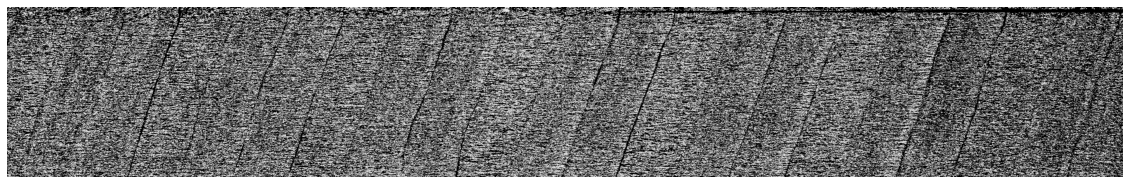

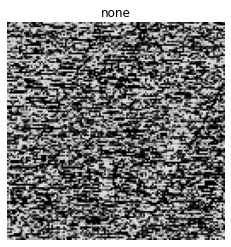

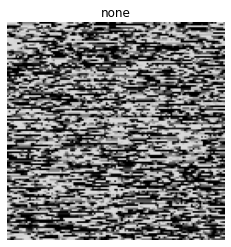

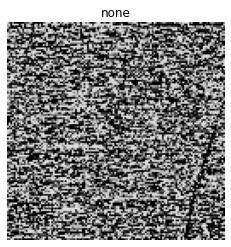

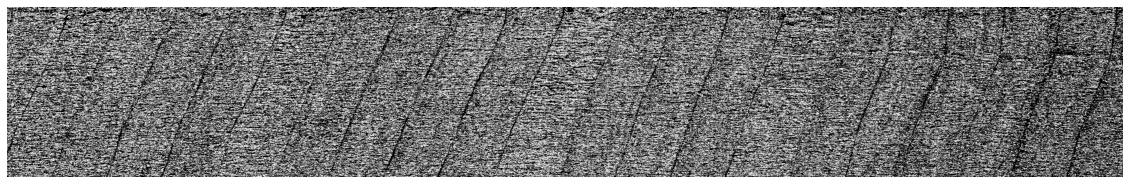

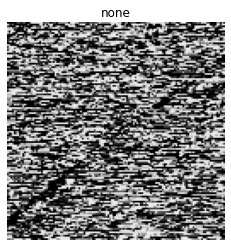

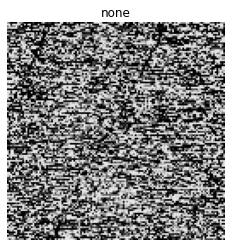

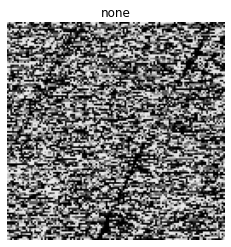

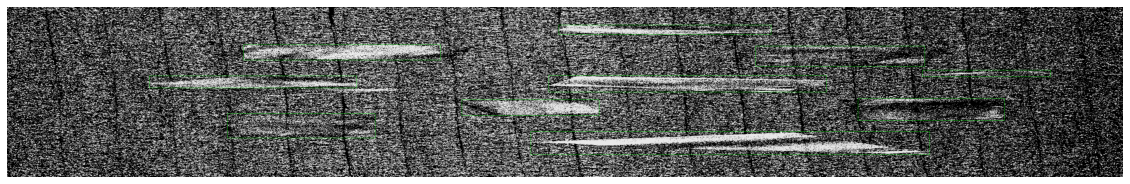

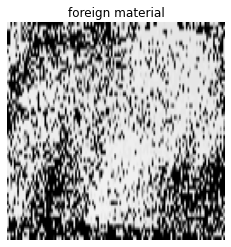

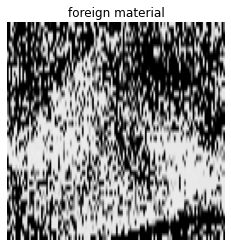

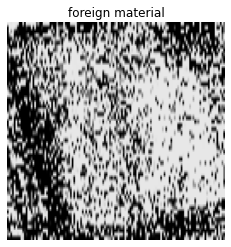

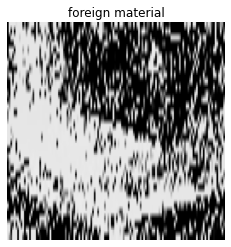

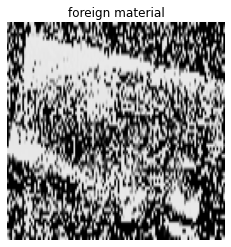

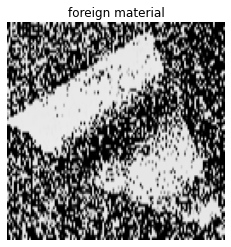

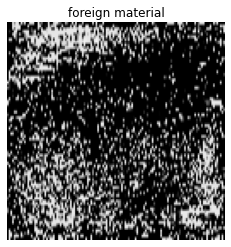

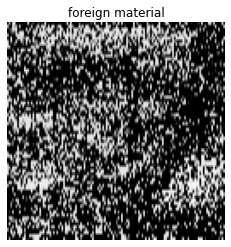

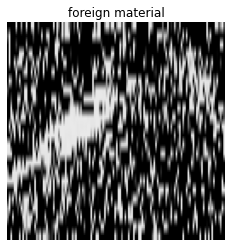

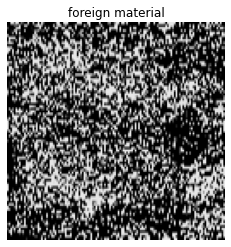

In [8]:
box_cols_abs = ['ymin', 'xmin', 'ymax', 'xmax']
box_cols_rel = ['ymin_rel', 'xmin_rel', 'ymax_rel', 'xmax_rel']
colors = np.array([[0., 1., 0.]])
for item in ds.take(6):
    img = item[0]
    filename = item[1].numpy().decode('utf-8')
    idx = df['filename'] == filename
    if any(idx):
        boxes_rel = df.loc[idx, box_cols_rel].to_numpy()
        img_boxes = tf.image.draw_bounding_boxes(img[tf.newaxis], np.expand_dims(boxes_rel, axis=0), colors)
        plt.figure(figsize=(20, 10))
        plt.imshow(np.squeeze(img_boxes))
        plt.axis(False)
        plt.show()

        boxes_abs = df.loc[idx, box_cols_abs].to_numpy()
        classes = df.loc[idx, 'class'].to_numpy()
        for i in range(boxes_abs.shape[0]):
            plt.figure()
            img_crop = tf.image.crop_to_bounding_box(img, boxes_abs[i, 0], boxes_abs[i, 1], boxes_abs[i, 2] - boxes_abs[i, 0], boxes_abs[i, 3] - boxes_abs[i, 1])
            img_crop = tf.image.resize(img_crop, size=(128, 128))
            plt.imshow(img_crop)
            plt.axis(False)
            plt.title(classes[i])
            plt.show()
    else:
        plt.figure(figsize=(20, 10))
        plt.imshow(np.squeeze(img))
        plt.axis(False)
        plt.show()

        for i in range(3):
            plt.figure()
            max_dim = tf.cast(tf.reduce_min(tf.shape(img)[:2]), tf.int64)
            crop_size = tf.random.uniform(shape=[2], minval=128, maxval=max_dim, dtype=tf.int64)
            img_crop = tf.image.random_crop(img, size=(crop_size[0], crop_size[1], 3))
            img_crop = tf.image.resize(img_crop, (128, 128))
            plt.imshow(img_crop)
            plt.axis(False)
            plt.title('none')
            plt.show()

### Work program for next week

##### 1. Get familiar with this notebook and the dataset

The data provided here consists of all available labeled images as well as a subset of the unlabeled images. Coordinates of bounding boxes and associated class labels can be found in the dataframe loaded from the two csv files.

##### 2. Train a variational autoencoder and / or a gan

Use 128 x 128 snippets for this. The above code shows how to extract snippets with and without errors from the dataset. I would recommend to create a new dataset containing only smaller snippets because loading the larger images from disk requires quite some time. Moreover, it would probably make sense to save the images in the new dataset in grayscale format (1 channel instead of 3).

##### 3. Generate some synthetical images using your readily trained model

### You do not need to finish this until Tuesday. Take your time and enjoy the weekend! :-)